In [1]:
# Libraries

# pandas
import pandas as pd

# matplotlib
import matplotlib.pyplot as plt 

# seaborn
import seaborn as sns

# numpy
import numpy as np

# sklearn
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Classification Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
# Reading the dataset

crop_df = pd.read_csv('Datasets/best_crop.csv')
crop_df.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,Gujarat,36,24,41,24.944676,94.257027,7.009180,103.879935,Anar
1,Gujarat,40,29,42,24.632287,89.015745,7.104095,110.695618,Anar
2,Gujarat,0,17,42,23.202426,91.194427,6.859841,109.094632,Anar
3,Gujarat,6,18,37,19.656901,89.937010,5.937650,108.045893,Anar
4,Gujarat,32,13,42,23.501282,92.975275,5.786058,106.619050,Anar


In [3]:
# shape of dataset - checking the no. of rows and columns

crop_df.shape

(1765, 9)

In [4]:
# checking for null values

crop_df.isnull().sum()

State           0
Nitrogen        0
Phosphorous     0
Potassium       0
Temperature     0
Humidity        0
pH              0
Rainfall        0
Crop            0
dtype: int64

In [5]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1765 non-null   object 
 1   Nitrogen      1765 non-null   int64  
 2   Phosphorous   1765 non-null   int64  
 3   Potassium     1765 non-null   int64  
 4   Temperature   1765 non-null   float64
 5   Humidity      1765 non-null   float64
 6   pH            1765 non-null   float64
 7   Rainfall      1765 non-null   float64
 8   Crop          1765 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 124.2+ KB


In [6]:
# convert object data to int data

# State
unq_state = list(set(crop_df['State']))
dictOfWords_state = { unq_state[i] : i for i in range(len(unq_state)) }
crop_df['State'] = crop_df['State'].map(dictOfWords_state)

# Crop
unq_crop = list(set(crop_df['Crop']))
dictOfWords_crop = { unq_crop[i] : i for i in range(len(unq_crop)) }
crop_df['Crop'] = crop_df['Crop'].map(dictOfWords_crop)

In [7]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         1765 non-null   int64  
 1   Nitrogen      1765 non-null   int64  
 2   Phosphorous   1765 non-null   int64  
 3   Potassium     1765 non-null   int64  
 4   Temperature   1765 non-null   float64
 5   Humidity      1765 non-null   float64
 6   pH            1765 non-null   float64
 7   Rainfall      1765 non-null   float64
 8   Crop          1765 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 124.2 KB


In [8]:
crop_df.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall,Crop
0,5,36,24,41,24.944676,94.257027,7.009180,103.879935,12
1,5,40,29,42,24.632287,89.015745,7.104095,110.695618,12
2,5,0,17,42,23.202426,91.194427,6.859841,109.094632,12
3,5,6,18,37,19.656901,89.937010,5.937650,108.045893,12
4,5,32,13,42,23.501282,92.975275,5.786058,106.619050,12


In [9]:
# Separate independent and dependent columns

x = crop_df.drop(['Crop'], axis=1)
y = crop_df[['Crop']]

In [10]:
x.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall
0,5,36,24,41,24.944676,94.257027,7.009180,103.879935
1,5,40,29,42,24.632287,89.015745,7.104095,110.695618
2,5,0,17,42,23.202426,91.194427,6.859841,109.094632
3,5,6,18,37,19.656901,89.937010,5.937650,108.045893
4,5,32,13,42,23.501282,92.975275,5.786058,106.619050


In [11]:
y.head()

,Crop
0,12
1,12
2,12
3,12
4,12


In [12]:
# Split data into train and test data

Xtrain,Xtest,Ytrain,Ytest = train_test_split(x, y, test_size = 0.2)

In [13]:
Xtrain.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall
790,23,6,139,199,25.673850,81.621213,6.290998,74.109194
1498,8,59,47,53,32.863166,91.461887,6.850663,47.271547
772,12,27,145,205,9.467960,82.293355,5.800243,66.027652
34,9,8,26,36,18.783596,87.402477,6.804781,102.518476
1456,8,37,18,12,10.270888,90.191477,7.401122,106.695520


In [14]:
Xtest.head()

,State,Nitrogen,Phosphorous,Potassium,Temperature,Humidity,pH,Rainfall
902,20,75,41,35,24.970426,78.626977,6.856833,166.641525
1229,16,31,60,24,25.404744,65.856754,7.722336,51.920573
1662,21,91,35,39,23.793920,80.418180,6.970860,206.261186
1049,22,66,44,20,19.078147,69.022986,6.740001,80.725159
437,22,22,72,85,18.868056,15.658092,6.391174,88.510490


In [15]:
Ytrain.head()

,Crop
790,2
1498,14
772,2
34,12
1456,10


In [16]:
Ytest.head()

,Crop
902,17
1229,6
1662,8
1049,13
437,15


In [17]:
# Feature Scaling

scalar = StandardScaler()
Xtrain = scalar.fit_transform(Xtrain)
Xtest = scalar.transform(Xtest)

In [18]:
# Build Classification Model

models = {
    DecisionTreeClassifier():'Decision Tree',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}

for m in models.keys():
    m.fit(Xtrain,Ytrain.values.ravel())

for model,name in models.items():
    print(f"Accuracy Score for {name} is : ",model.score(Xtest,Ytest)*100,"%")

Accuracy Score for Decision Tree is :  98.30028328611898 %
Accuracy Score for Random Forest is :  100.0 %
Accuracy Score for Support Vector Machine is :  98.01699716713881 %


In [19]:
# Random Forest gives the highest accuracy - 99.167%

rfc = RandomForestClassifier()
rfc.fit(Xtrain,Ytrain.values.ravel())

RandomForestClassifier()

In [20]:
# Testing with user input

State = input("Enter State: ")
N = float(input("Enter amount of Nitrogen in soil: "))
P = float(input("Enter amount of Phosphorous in soil: "))
K = float(input("Enter amount of Potassium in soil: "))
Temp = float(input("Enter Temperature (in C): "))
Hum = float(input("Enter Humidity (in %): "))
pH = float(input("Enter pH level of soil: "))
Rainfall = float(input("Enter amount of Rainfall: "))

State = dictOfWords_state[State]

user_input = [[State, N, P, K, Temp, Hum, pH, Rainfall]]

sc = StandardScaler()
sc.fit(user_input)
user_input = scalar.transform(user_input)

op = rfc.predict(user_input)

crop = [k for k, v in dictOfWords_crop.items() if v == op[0]][0]

print("\nThe best crop for the given conditions would be: ",crop)

Enter State: Maharashtra
Enter amount of Nitrogen in soil: 53
Enter amount of Phosphorous in soil: 14
Enter amount of Potassium in soil: 78
Enter Temperature (in C): 24.564653
Enter Humidity (in %): 53.12654
Enter pH level of soil: 6.7568
Enter amount of Rainfall: 45.54564

The best crop for the given conditions would be:  Masur


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [21]:
# Predicting the Price for the best crop predicted above

In [22]:
# Reading the Dataset

crop_price_df = pd.read_csv('Datasets/Price/'+crop+'.csv')
crop_price_df.head()

,State,Market,Date,Month,Year,Price
0,Assam,Howly,01-01-2019,1,2019,4400.0
1,Assam,Howly,03-01-2019,1,2019,4500.0
2,Assam,Howly,21-01-2019,1,2019,4500.0
3,Assam,Howly,28-01-2019,1,2019,4600.0
4,Assam,Howly,05-02-2019,2,2019,4600.0


In [23]:
# Shape of Dataset - checking the no. of rows and columns

crop_price_df.shape

(27604, 6)

In [24]:
# Checking for Null Values

crop_df.isnull().sum()

State           0
Nitrogen        0
Phosphorous     0
Potassium       0
Temperature     0
Humidity        0
pH              0
Rainfall        0
Crop            0
dtype: int64

<Axes: >

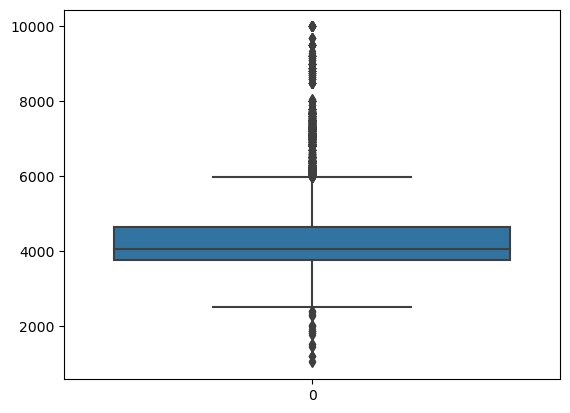

In [25]:
# Plotting a box plot to check for outliers

sns.boxplot(crop_price_df['Price'])

In [26]:
# Outlier Removal

# IQR - interquartile range - the range of values that resides in the middle of the scores

Q1 = np.percentile(crop_price_df['Price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(crop_price_df['Price'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

# upper bound
upper = np.where(crop_price_df['Price'] >= (Q3 + 1.5*IQR))

# lower bound
lower = np.where(crop_price_df['Price'] <= (Q1 - 1.5*IQR))

# Removing the outliers, i.e., the upper and lower bounds
crop_price_df.drop(upper[0], inplace = True)
crop_price_df.drop(lower[0], inplace = True)

C:\Users\Jaskaran\AppData\Local\Temp\ipykernel_2232\4103001924.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(crop_price_df['Price'], 25, interpolation = 'midpoint')
C:\Users\Jaskaran\AppData\Local\Temp\ipykernel_2232\4103001924.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(crop_price_df['Price'], 75, interpolation = 'midpoint')


In [27]:
# Checking the new shape of dataset

crop_price_df.shape

(25472, 6)

<Axes: >

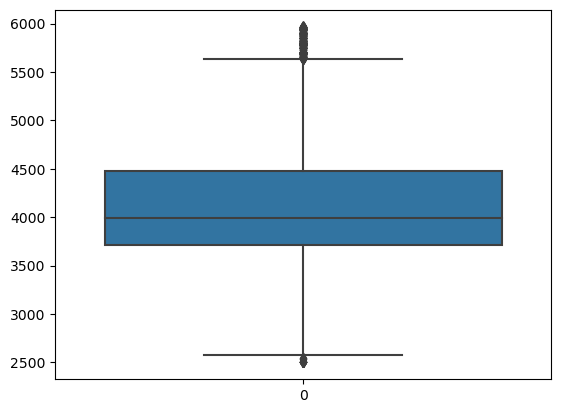

In [28]:
sns.boxplot(crop_price_df['Price'])

In [29]:
crop_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25472 entries, 0 to 27285
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   25472 non-null  object 
 1   Market  25472 non-null  object 
 2   Date    25472 non-null  object 
 3   Month   25472 non-null  int64  
 4   Year    25472 non-null  int64  
 5   Price   25472 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ MB


In [30]:
# convert necessary object data to int data

# State - Price Data Frame (pdf)
unq_state_pdf = list(set(crop_price_df['State']))
dictOfWords_state_pdf = { unq_state_pdf[i] : i for i in range(len(unq_state_pdf)) }
crop_price_df['State'] = crop_price_df['State'].map(dictOfWords_state_pdf)

# Market
unq_market_pdf = list(set(crop_price_df['Market']))
dictOfWords_market_pdf = { unq_market_pdf[i] : i for i in range(len(unq_market_pdf)) }
crop_price_df['Market'] = crop_price_df['Market'].map(dictOfWords_market_pdf)

In [31]:
crop_price_df.head()

,State,Market,Date,Month,Year,Price
0,9,45,01-01-2019,1,2019,4400.0
1,9,45,03-01-2019,1,2019,4500.0
2,9,45,21-01-2019,1,2019,4500.0
3,9,45,28-01-2019,1,2019,4600.0
4,9,45,05-02-2019,2,2019,4600.0


In [32]:
# Separate independent and dependent columns

X = crop_price_df[['State', 'Market', 'Month', 'Year']]
Y = crop_price_df[['Price']]

In [33]:
X.head()

,State,Market,Month,Year
0,9,45,1,2019
1,9,45,1,2019
2,9,45,1,2019
3,9,45,1,2019
4,9,45,2,2019


In [34]:
Y.head()

,Price
0,4400.0
1,4500.0
2,4500.0
3,4600.0
4,4600.0


In [35]:
# Split data into train and test data

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.2)

In [36]:
# Build Regression Model

models = {
    LinearRegression():'Linear Regression',
    RandomForestRegressor():'Random Forest Regressor',
    GradientBoostingRegressor():'Gradient Boosting Regressor',
}

for m in models.keys():
    m.fit(X_train,Y_train.values.ravel())

for model,name in models.items():
    print(f"Accuracy Score for {name} is : ",model.score(X_test,Y_test)*100,"%")

Accuracy Score for Linear Regression is :  37.78175104601311 %
Accuracy Score for Random Forest Regressor is :  92.78601016569746 %
Accuracy Score for Gradient Boosting Regressor is :  77.47235367464216 %


In [37]:
# Random Forest Regressor gives the best accuracy

rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train.values.ravel())

RandomForestRegressor()

In [38]:
# Testing with user input

State_pdf = [k for k, v in dictOfWords_state.items() if v == State][0]
Market = input("Enter the name of the Market: ")
Month = int(input("Enter the Month (number): "))
Year = int(input("Enter the Year (YYYY): "))

State_pdf = dictOfWords_state_pdf[State_pdf]
Market = dictOfWords_market_pdf[Market]

user_input = [[State_pdf,Market,Month,Year]]

predicted_price = rfr.predict(user_input)[0]

print("\nPredicted Price = Rs.", predicted_price, "per Quintal")

Enter the name of the Market: Mumbai
Enter the Month (number): 2
Enter the Year (YYYY): 2024

Predicted Price = Rs. 5354.4718441781 per Quintal


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
